## Load Libraries

In [1]:
## Plotting Libaray
import matplotlib.pyplot as plt ## used for creating Graphs and charts
import seaborn as sns ## used for creating Graphs and charts
import plotly.express as px
## Pandas Dataframe Library
import pandas as pd 
## Numpy Library
import numpy as np ## used for methamtical compution and handle multi-dimensional arrays and matrices
## Train and Test Split
from sklearn.model_selection import train_test_split
## Evaluation Matrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Normalize
from sklearn.preprocessing import StandardScaler
## Models
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import xgboost as XGBClassifier
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout
from keras.optimizers import *
## Kfold and ROC
from sklearn.metrics import accuracy_score,auc
from sklearn import preprocessing
## Sampling Technique
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

## Importing dataset


In [4]:
df = pd.read_csv (r'C:\Users\faiqa\Downloads\code\code\New_Wav_Set_gpu_Add_noise.csv')


In [5]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,279,280,281,282,283,284,285,286,287,EVENTS
0,-524.309204,54.119823,-29.046663,20.456963,-4.020579,18.872765,-5.430302,7.887723,2.320919,-0.680859,...,0.047693,0.000982,0.047693,0.003957,0.013916,7.710125,0.176152,0.000677,0.176152,police_siren
1,-460.817443,18.320545,-18.052451,5.783925,2.953812,10.568577,0.686862,3.508634,4.064032,-0.629869,...,0.047670,0.001223,0.047670,0.004005,0.013936,7.697752,0.177207,0.000687,0.177207,police_siren
2,-458.077026,70.737419,29.732494,28.730505,23.089603,13.038505,10.418894,8.845700,7.042854,6.941899,...,0.400289,0.003638,0.400289,0.599422,1.881032,7.425132,26.528872,0.207177,26.528872,explosion
3,-276.169611,22.346240,11.171237,10.389476,10.187685,6.309208,4.499051,4.094253,3.290014,3.552038,...,0.400520,0.008856,0.400520,0.602432,1.881265,7.509986,26.611770,0.206917,26.611770,explosion
4,-409.186829,90.520813,0.597680,27.039671,5.958148,7.617988,-0.059910,11.371256,6.562818,3.329183,...,0.322958,0.004190,0.322958,0.126391,0.154783,6.872290,2.311194,0.092176,2.311194,baby_cry


## Number of Rows and Columns

In [6]:
## Dimensionlaity of the Model
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 21920
Number of Columns: 289


## Columns

In [7]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '279', '280', '281', '282', '283', '284', '285', '286', '287',
       'EVENTS'],
      dtype='object', length=289)

# Type of Columns

In [8]:
df.dtypes

0         float64
1         float64
2         float64
3         float64
4         float64
           ...   
284       float64
285       float64
286       float64
287       float64
EVENTS     object
Length: 289, dtype: object

## SUmmary 
* Count
* mean
* Min
* Max
* STD

In [9]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
count,21920.000000,21920.000000,21920.000000,21920.000000,21920.000000,21920.000000,21920.000000,21920.000000,21920.000000,21920.000000,...,21920.000000,21920.000000,21920.000000,21920.000000,21920.000000,21920.000000,21920.000000,21920.000000,21920.000000,21920.000000
mean,-362.028138,76.656521,13.867724,23.134419,13.530277,14.430811,5.822029,8.036747,5.193717,4.238122,...,5.775532,0.309760,0.016260,0.309760,13.152576,47.103890,8.849090,662.805056,4.298539,662.805056
std,97.657851,49.301453,20.346455,12.874986,9.791746,7.339059,6.582927,4.998027,4.381847,3.692239,...,3.919830,0.182288,0.030398,0.182288,48.093591,127.693634,7.044356,1619.426792,22.643005,1619.426792
min,-715.911499,-11.668478,-63.292484,-16.191671,-40.169548,-14.121813,-23.693340,-7.884364,-22.042070,-9.996052,...,-4.468212,0.014182,0.000237,0.014182,0.000325,0.000291,-0.713021,0.002335,0.000226,0.002335
25%,-421.857081,33.294281,1.644415,13.633983,7.246328,9.105665,1.900678,4.566417,2.584016,2.037084,...,2.996791,0.192776,0.004903,0.192776,0.212657,0.394238,3.170138,5.272842,0.058269,5.272842
50%,-357.984077,75.522910,13.289176,22.364407,13.175408,14.100489,6.082306,7.615932,5.320516,4.385919,...,4.824554,0.266555,0.008895,0.266555,1.112405,3.049377,6.306443,46.097932,0.186928,46.097932
75%,-288.116650,117.666468,26.232846,32.444798,20.451285,19.313216,10.139115,11.193497,7.875841,6.620364,...,7.159447,0.408839,0.016376,0.408839,8.850539,31.117038,13.208955,369.923990,1.086804,369.923990
max,89.179722,230.009125,87.233833,69.558220,45.402035,47.930321,27.024879,29.738153,21.592770,16.572027,...,17.601891,0.929123,0.616648,0.929123,1308.895084,1851.174838,30.116535,10169.772653,918.713623,10169.772653


## Description for Categorical Columns

In [10]:
df.describe(include=['object'])

,EVENTS
count,21920
unique,10
top,machine_gun
freq,2836


## Data Info Checking any Null Value

In [11]:
df.isnull().sum()  

0         0
1         0
2         0
3         0
4         0
         ..
284       0
285       0
286       0
287       0
EVENTS    0
Length: 289, dtype: int64

In [12]:
## The methatical model of linear interpolation is performed on the dataframe to handle data linearly
df = df.interpolate() 

C:\Users\faiqa\AppData\Local\Temp\ipykernel_15564\428694935.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()


In [13]:
## Padding Interpolation is used to fill in the gaps left by Linear Interpolation. When using padding interpolation, you must set a limit, which is the maximum amount of nans the technique may fill in a row.
# df = df.interpolate(method='pad', limit=15) 

In [14]:
df.isnull().sum()  

0         0
1         0
2         0
3         0
4         0
         ..
284       0
285       0
286       0
287       0
EVENTS    0
Length: 289, dtype: int64

## Exploratory Analysis

<Axes: xlabel='EVENTS', ylabel='count'>

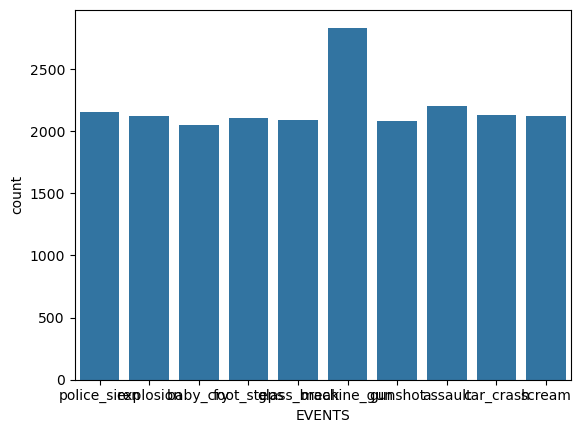

In [15]:
sns.countplot(x = df['EVENTS'])

In [16]:
print(df["EVENTS"].value_counts())

EVENTS
machine_gun     2836
assault         2208
police_siren    2154
car_crash       2130
explosion       2126
scream          2126
foot_steps      2108
glass_break     2094
gunshot         2086
baby_cry        2052
Name: count, dtype: int64


In [17]:
%matplotlib inline

df["EVENTS"].value_counts().plot(kind='barh')
plt.savefig('events_count.pdf', dpi=1)

In [18]:
## Split dataset

x = df.iloc[:,:-1].values
y = df["EVENTS"].values

# x = df.drop(['id','stroke'],axis=1)
# y = df[[ 'stroke']]

## Train and Test Split

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

## Model Training

# Active Learning Ensmble

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Split the training data into initial labeled and pool sets
X_labeled, X_pool, y_labeled, y_pool = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [21]:
print(X_train.shape,  X_test.shape, y_train.shape,  y_test.shape)

(17536, 288) (4384, 288) (17536,) (4384,)


In [22]:
print(X_labeled.shape,  X_pool.shape, y_labeled.shape,  y_pool.shape)

(14028, 288) (3508, 288) (14028,) (3508,)


In [39]:


# Initialize the classifier
clf = ensemble

# Set the criteria for the active learning loop
max_iterations = 10 # maximum number of iterations to perform
min_accuracy = 0.95 # desired minimum accuracy to stop the loop

# Loop over the active learning process
for i in range(max_iterations):
    # Train the classifier on the labeled data
    clf.fit(X_labeled, y_labeled)
    
    # Use the trained classifier to predict the labels of the pool set
    y_pred = clf.predict(X_pool)
    
    # Evaluate the accuracy of the predictions
    accuracy = np.mean(y_pred == y_pool)
    
    # Check if the desired minimum accuracy has been reached
    if accuracy >= min_accuracy:
        print("Active learning loop stopped at iteration {} with accuracy {}".format(i, accuracy))
        break
    
    # Find the index of the most uncertain sample
    uncertainty = clf.predict_proba(X_pool).max(axis=1)
    
     # Calculate the entropy of each instance, which is a measure of uncertainty
    entropy = -np.sum(uncertainty * np.log(uncertainty), axis=1)
    
    # Find the instance with the highest entropy
    uncertain_sample = np.argmax(entropy)
    
    # Add the most uncertain sample to the labeled data
    X_labeled = np.concatenate((X_labeled, X_pool[uncertain_sample].reshape(1, -1)))
    y_labeled = np.concatenate((y_labeled, [y_pool[uncertain_sample]]))
    
    # Remove the most uncertain sample from the pool set
    X_pool = np.delete(X_pool, uncertain_sample, 0)
    y_pool = np.delete(y_pool, uncertain_sample)
    
# Use the final classifier to make predictions on the test set
y_test_pred = clf.predict(X_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
# Print the classification report
cr = classification_report(y_test, y_test_pred)
print(cr)

2023-01-30 11:42:22.484318: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-30 11:42:22.488358: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-30 11:42:22.489109: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-30 11:42:22.491624: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              289000    
_________________________________________________________________
dense_1 (Dense)              (None, 750)               750750    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               375500    
_________________________________________________________________
dense_3 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               25100     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5

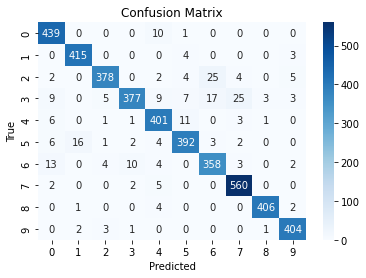

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# # make predictions on the test set
# y_pred = model.predict(X_test)

# # calculate the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# print the classification report
# print(classification_report(y_test, y_pred))

In [41]:
print(X_train.shape,  X_test.shape, y_train.shape,  y_test.shape)

(17536, 288) (4384, 288) (17536,) (4384,)


In [42]:
print(X_labeled.shape,  X_pool.shape, y_labeled.shape,  y_pool.shape)

(14028, 288) (3508, 288) (14028,) (3508,)


In [2]:

# Initialize the classifier
clf = ensemble

# Set the criteria for the active learning loop
max_iterations = 10 # maximum number of iterations to perform
min_accuracy = 0.95 # desired minimum accuracy to stop the loop

# Loop over the active learning process
for i in range(max_iterations):
    # Train the classifier on the labeled data
    clf.fit(X_labeled, y_labeled)
    
    # Use the trained classifier to predict the labels of the pool set
    y_pred = clf.predict(X_pool)
    
    # Evaluate the accuracy of the predictions
    accuracy = np.mean(y_pred == y_pool)
    
    # Check if the desired minimum accuracy has been reached
    if accuracy >= min_accuracy:
        print("Active learning loop stopped at iteration {} with accuracy {}".format(i, accuracy))
        break
    
    # Find the index of the most uncertain sample
    uncertainty = clf.predict_proba(X_pool).max(axis=1)
    
     # Calculate the entropy of each instance, which is a measure of uncertainty
    entropy = -np.sum(uncertainty * np.log(uncertainty), axis=1)
    
    # Find the instance with the highest entropy
    uncertain_sample = np.argmax(entropy)
    
    # Add the most uncertain sample to the labeled data
    X_labeled = np.concatenate((X_labeled, X_pool[uncertain_sample].reshape(1, -1)))
    y_labeled = np.concatenate((y_labeled, [y_pool[uncertain_sample]]))
    
    # Remove the most uncertain sample from the pool set
    X_pool = np.delete(X_pool, uncertain_sample, 0)
    y_pool = np.delete(y_pool, uncertain_sample)
    
# Use the final classifier to make predictions on the test set
y_test_pred = clf.predict(X_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
# Print the classification report
cr = classification_report(y_test, y_test_pred)
print(cr)

NameError: name 'ensemble' is not defined